In [1]:
import data_pulling

In [2]:
from datetime import datetime

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
# words = "ukraine%20invasion"
# start = "2022-03-05T00:00:00.000Z"
# end = "2022-03-06T23:55:00.000Z"

In [6]:
tweets = data_pulling.read_jsons('ukraine_feb_21/*')
users = data_pulling.read_json('ukraine_feb_21_user_data/user_data.json')
tweets = data_pulling.attach_users_to_tweets(tweets, users)
tweets = data_pulling.remove_none_ids(tweets)
tweets = data_pulling.remove_zero_followers(tweets)
tweets.sort(key = data_pulling.date_score)

In [7]:
median_score = np.median([data_pulling.normalized_engagement_smoothed(tweet) for tweet in tweets])

In [23]:
def sum_engagement(score_arr):
    return - np.median(np.log([(item[2]) for item in score_arr]))

In [24]:
def sum_engagement2(score_arr):
    return len([(item[0]) for item in score_arr])

In [25]:
def sum_engagement3(score_arr):
    return np.sum([(item[0]) for item in score_arr])

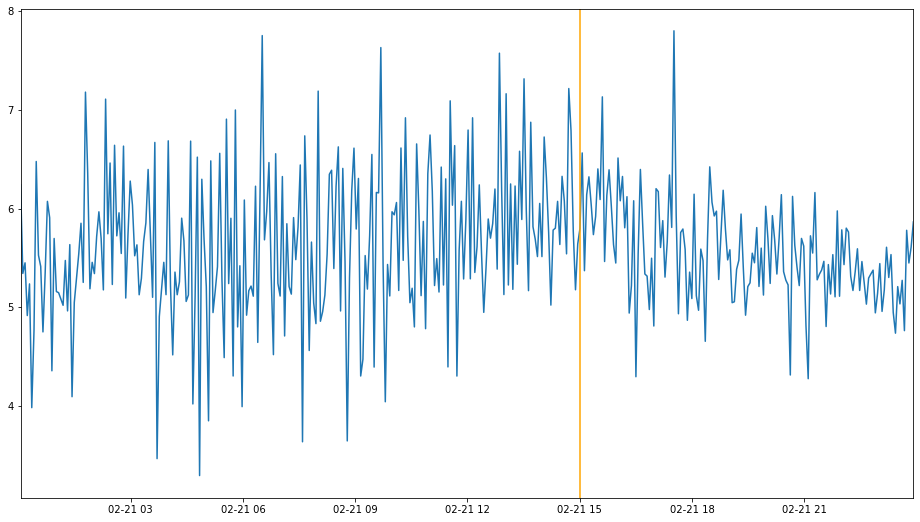

There are 2.564365604378531 times more tweets per hour from 2022-02-21T15:00:00.000Z to 2022-02-21 23:54:55 than from 2022-02-21 00:03:36.235000 to 2022-02-21T15:00:00.000Z


In [27]:
date_mid = '2022-02-21T15:00:00.000Z'
date_time = datetime.strptime(date_mid, '%Y-%m-%dT%H:%M:%S.%fZ')

engage = data_pulling.total_engagement
follow = data_pulling.followers
smoooth = data_pulling.normalized_engagement_smoothed

x_pos, y_pos, date_value = data_pulling.binify(tweets,
                                               400,
                                               date_mid,
                                               [engage, follow, smoooth],
                                               sum_engagement,
                                               debug = False)


# for i in range(len(y_pos)):
#     if y_pos[i] > 10000: y_pos[i] = 0


plt.figure(figsize=[16,9])
plt.xlim([x_pos[0], x_pos[-1]])
plt.plot(x_pos, y_pos)
plt.axvline(x=date_time, color = 'orange')

# plt.plot(x_pos[4:], np.convolve(y_pos, np.ones(5), 'valid') / 5)
plt.show()

rate_before = date_time.timestamp() - x_pos[0].timestamp()

rate_after = x_pos[-1].timestamp() - date_time.timestamp()

score = ((1 - date_value) / rate_after) / (date_value / rate_before)

print('There are', score, 'times more tweets per hour from', date_mid, 'to', x_pos[-1], 'than from', x_pos[0], 'to', date_mid)


# In[189]:

In [29]:
median_log = np.median([np.log(data_pulling.normalized_engagement_smoothed(tweet)) for tweet in tweets])

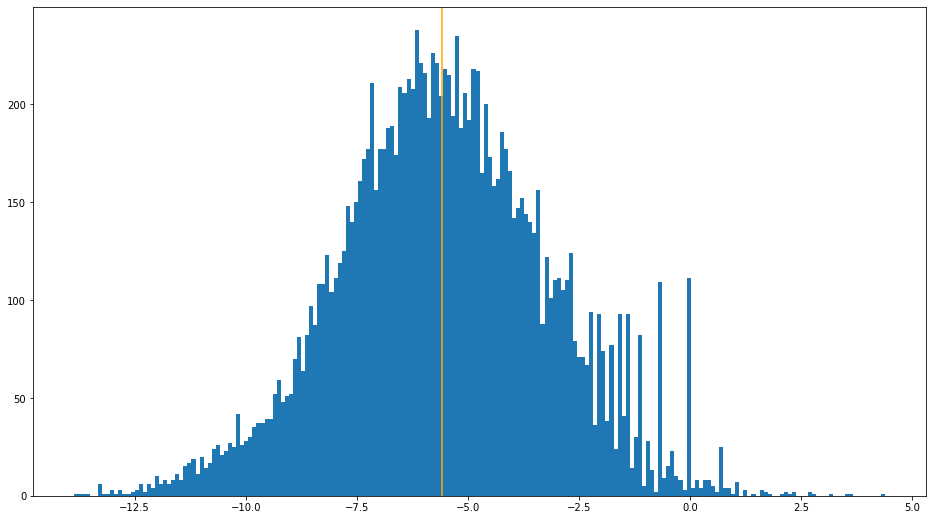

In [30]:
# data_pulling.metric_hist(lambda tweet: np.log(data_pulling.normalized_engagement_smoothed(tweet)), tweets)

plt.figure(figsize=[16,9])
plt.hist([np.log(data_pulling.normalized_engagement_smoothed(tweet)) for tweet in tweets], bins = 200)
plt.axvline(median_log, color = 'orange')